In [13]:
#it is use when there is overfitting 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.datasets import load_diabetes

In [14]:
data=load_diabetes()

In [15]:
X=data.data
y=data.target

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
l=LinearRegression()

In [17]:
l.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=l.predict(X_test)

In [26]:
print("r2_score",r2_score(y_test,y_pred))
print("rmse_score",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score 0.4399338661568968
rmse_score 55.627840795469155


In [27]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.0001)

In [28]:
r.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [29]:
y_pred1=r.predict(X_test)

In [34]:
print("r2_score",r2_score(y_test,y_pred1))
print("rmse_score",np.sqrt(mean_squared_error(y_test,y_pred1)))

r2_score 0.44004295115526704
rmse_score 55.6224231688166


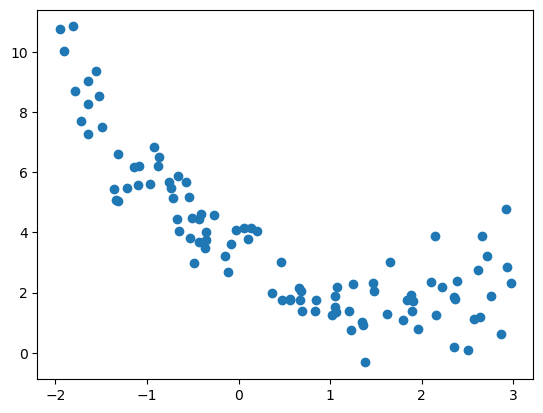

In [35]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.randn(m,1)
plt.scatter(x1,x2)

In [36]:
pass

<h3>RIDGE REGRESSION FROM SCRATCH</h3>

In [37]:
#IT IS SAME AS THE NORMAL LINEAR REGRESSION IMPLEMENTATION
#ONLY DIFFRENCE
#IS HERE THERE IS DIFFRENCE IN CALCULATING VALUE OF M
#HERE WE TAKE VALUE OF ERROR FUNCTION BUT BY ADDING x(M)^2 HERE X IS ALPHA
#AFTER DIFFRENTATION WRT M AND WRT B WE GET SAME VALUE OF B AS IN LR AND
#SAME VALUE OF M AS IN LR BUT ALPHA GET ADDED IN THE DENOMINATOR



In [40]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

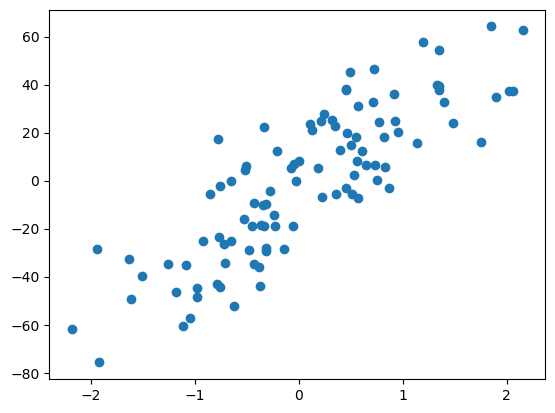

In [42]:
plt.scatter(X,y)

In [44]:
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [46]:
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235726


In [47]:
rrl=Ridge(alpha=100)
rrl.fit(X,y)
print(rrl.coef_)
print(rrl.intercept_)

[12.93442104]
-1.4248441496033308


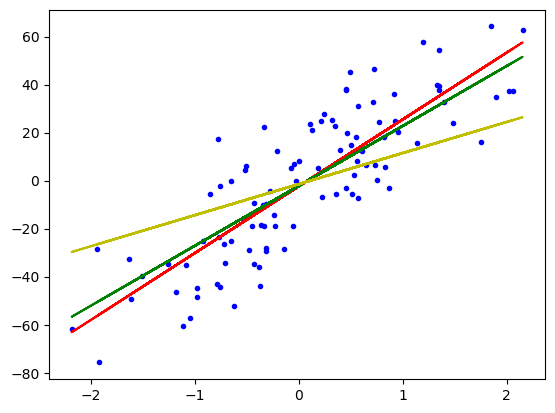

In [49]:
#reducing slope too much that means big alpha may lead to underfitting
plt.plot(X,y,'b.',label='orignal points')
plt.plot(X,lr.predict(X),'r-',label='lr with aplha=0')
plt.plot(X,rr.predict(X),'g-',label='ridge with aplha=10')
plt.plot(X,rrl.predict(X),'y-',label='ridge with aplha=100')

In [55]:
#from scratch implementation
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num=num+((X_train[i]-X_train.mean())*(y_train[i]-y_train.mean()))
            den=den+((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))
        self.m=num/(den+self.alpha)
        self.b=y_train.mean()-(self.m*X_train.mean())
        print(self.m,self.b)


In [58]:
reg=MeraRidge(alpha=10)


In [59]:
reg.fit(X,y)

[24.9546267] [-2.126913]
